In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'D:\\Power BI\\Practical\\last-three-month-retail-order.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()
print(data_info)
print(data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9886 entries, 0 to 9885
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No.             9886 non-null   int64 
 1   Practitioner Name  9886 non-null   object
 2   Order Date         9886 non-null   object
 3   Product Name       9886 non-null   object
 4   Total Amount       9886 non-null   object
 5   Platform Fee       9886 non-null   object
dtypes: int64(1), object(5)
memory usage: 463.5+ KB
None
   Sr No.     Practitioner Name  Order Date  \
0       1           Hayley Khan  18-08-2024   
1       2  Harriet Bailey Smith  18-08-2024   
2       3       Louise Headland  18-08-2024   
3       4  James Turner Squires  18-08-2024   
4       5          Falak Kausar  18-08-2024   

                                        Product Name Total Amount Platform Fee  
0                                  Sosum M (2 x 1ml)   103.99 GBP        8 GBP  
1  Revolax Fine 

In [26]:
# Data Cleaning: Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')

# Extract numerical values and convert to float
data['Total Amount'] = data['Total Amount'].str.replace(' GBP', '').astype(float)
data['Platform Fee'] = data['Platform Fee'].str.replace(' GBP', '').astype(float)

# Check for any missing or inconsistent data after conversions
missing_data_summary = data.isnull().sum()
print("Missing data summary:")
print(missing_data_summary)

# Display cleaned data
data_cleaned_info = data.info()
data_cleaned_head = data.head()
print(data_cleaned_info)
print(data_cleaned_head)


Missing data summary:
Sr No.               0
Practitioner Name    0
Order Date           0
Product Name         0
Total Amount         0
Platform Fee         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9886 entries, 0 to 9885
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No.             9886 non-null   int64         
 1   Practitioner Name  9886 non-null   object        
 2   Order Date         9886 non-null   datetime64[ns]
 3   Product Name       9886 non-null   object        
 4   Total Amount       9886 non-null   float64       
 5   Platform Fee       9886 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 463.5+ KB
None
   Sr No.     Practitioner Name Order Date  \
0       1           Hayley Khan 2024-08-18   
1       2  Harriet Bailey Smith 2024-08-18   
2       3       Louise Headland 2024-08-18   
3       4

In [27]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'D:\\Power BI\\Practical\\data.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: D:\Power BI\Practical\data.csv


In [28]:
# Load the cleaned CSV file
cleaned_file_path = 'D:\\Power BI\\Practical\\data.csv'
data_cleaned = pd.read_csv(cleaned_file_path)

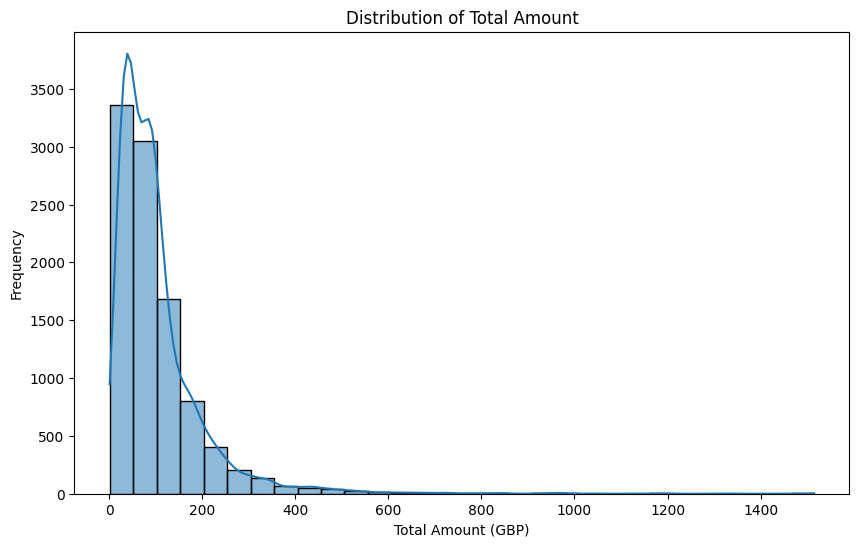

In [29]:
# Visualization 1: Histogram of Total Amount
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Total Amount'], kde=True, bins=30)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount (GBP)')
plt.ylabel('Frequency')
plt.show()

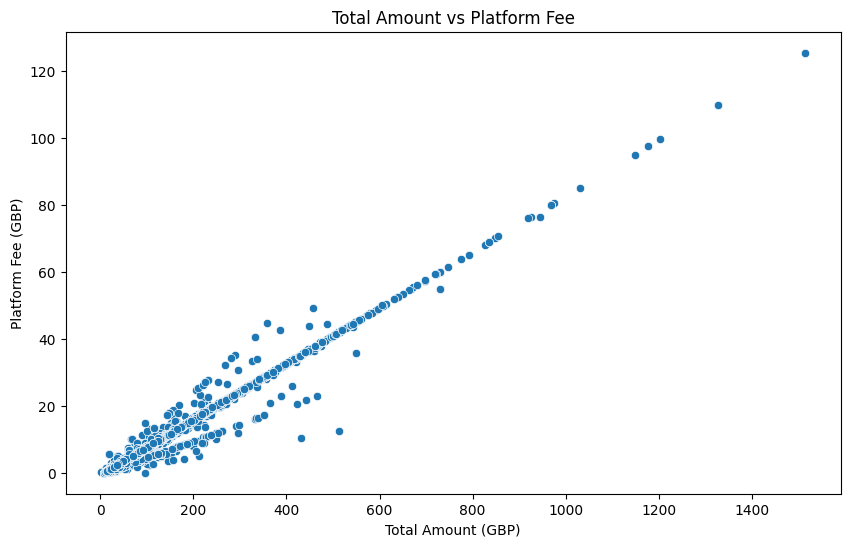

In [30]:
# Visualization 2: Scatter plot of Total Amount vs Platform Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Amount', y='Platform Fee', data=data_cleaned)
plt.title('Total Amount vs Platform Fee')
plt.xlabel('Total Amount (GBP)')
plt.ylabel('Platform Fee (GBP)')
plt.show()

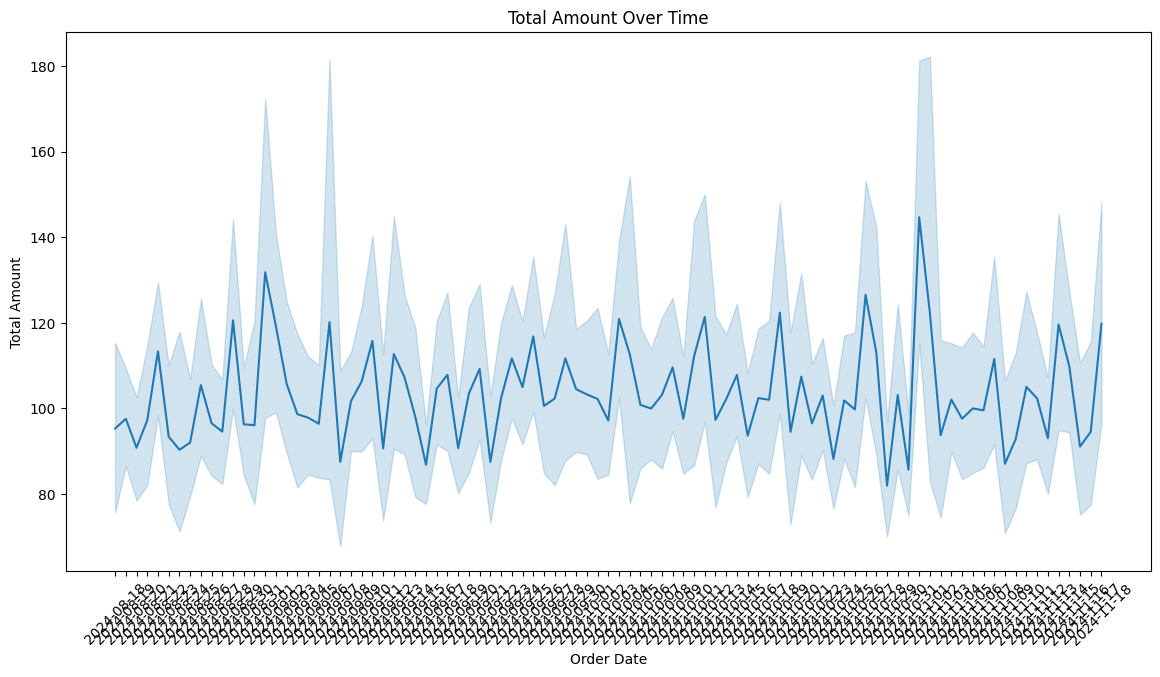

In [31]:
# Visualization 3: Line plot of Total Amount over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Total Amount', data=data_cleaned)
plt.title('Total Amount Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()